# EDA-Visualization 

Display the data according to graphs and find outliners 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
athlete_df= pd.read_csv("step 3-Cleaning Data records.csv")
athlete_df=athlete_df.drop(columns=["Unnamed: 0"])


In [3]:
athlete_df

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,mps,kmh
0,1,10.49,0.0,Florence GRIFFITH-JOYNER,2,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888,34.318398
1,1,9.58,0.9,Usain BOLT,1,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413,37.578288
2,3,9.68,4.1,Tyson GAY,1,39.0,USA,1.0,"Eugene, OR (USA)",29-06-2008,1295,26.0,10.330579,37.190083
3,4,9.69,5.0,Obadele THOMPSON,1,45.0,BAR,1.0,"El Paso, TX (USA)",13-04-1996,1286,20.0,10.319917,37.151703
4,4,9.69,-0.1,Yohan BLAKE,1,32.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",23-08-2012,1316,23.0,10.319917,37.151703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,28468,11.50,3.5,Carolyn MOLL,2,31.0,GER,4.0,Mannheim (GER),09-06-2012,1072,22.0,8.695652,31.304348
5299,28468,11.50,3.7,Lyudmila ZUYENKO,2,38.0,RUS,2.0,Florø (NOR),06-06-2009,1071,26.0,8.695652,31.304348
5300,28468,11.50,1.0,Ahtyana JOHNSON,2,28.0,USA,1.0,"Athens, GA (USA)",10-05-2014,1093,21.0,8.695652,31.304348
5301,28468,11.50,2.6,Kelsey LEWIS,2,25.0,USA,3.0,"Kearney, NE (USA)",06-05-2018,1078,22.0,8.695652,31.304348


# Categorical variables visualizations and analyzing


Text(0.5, 0.98, 'Gender pie charts')

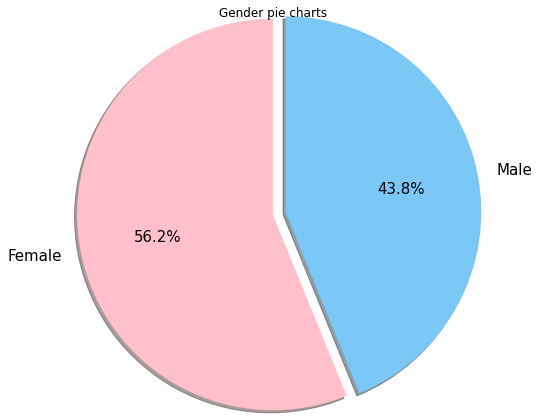

In [4]:
result = athlete_df['Gender'].value_counts()
value = result.values.tolist()
index = ['Female', 'Male']
colors =['#FFC0CB', '#7BC8F6']
fig, axs = plt.subplots(figsize=(7,6))

axs.pie(value, labels=index, autopct='%1.1f%%', shadow=True, startangle=90,
           explode=(0.05, 0.05), radius=1.5, colors=colors, textprops={'fontsize':15})

fig.suptitle('Gender pie charts')

Adding an age range and poisiton range columns-pie charts

30-45    1986
46+      1656
18-29    1368
Name: Age range, dtype: int64


<AxesSubplot:ylabel='Age range'>

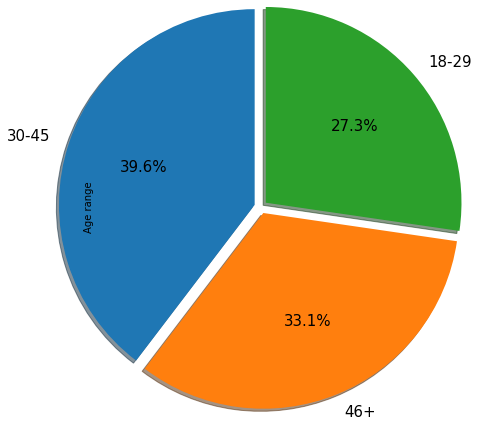

In [5]:
athlete_df['Age range'] = pd.cut(athlete_df['Age'],bins=[17,29,45,120], labels=["18-29","30-45","46+"])
a = athlete_df.groupby('Age range').size()
a = athlete_df['Age range'].value_counts()
print(a)
a.plot.pie(autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.05, 0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':15})


1-3    4515
4-5     456
6-9     153
Name: pos, dtype: int64


<AxesSubplot:ylabel='pos'>

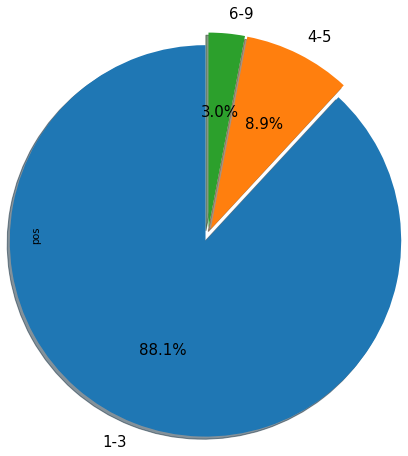

In [6]:
athlete_df['pos'] = pd.cut(athlete_df['Position'],bins=[0,3,5,9] ,labels=["1-3","4-5","6-9"])
a = athlete_df.groupby('pos').size()
a = athlete_df['pos'].value_counts()
print (a)
a.plot.pie(autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.05,0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':15})

9.5-10     2670
8.5-9      1916
9-9.5       407
10-10.5     310
Name: m/s, dtype: int64


<AxesSubplot:ylabel='m/s'>

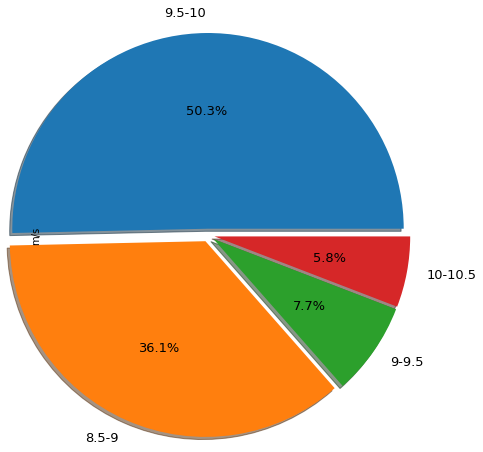

In [7]:
athlete_df['m/s'] = pd.cut(athlete_df['mps'],bins=[8.5,9,9.5,10,10.5], labels=["8.5-9","9-9.5","9.5-10","10-10.5"])
a = athlete_df.groupby('m/s').size()
a = athlete_df['m/s'].value_counts()
print (a)
a.plot.pie(autopct='%1.1f%%',shadow=True,startangle=0,explode=(0.05,0.05,0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':13})


In [8]:
athlete_df=athlete_df.sort_values(by='Result Score', ascending=False)
athlete_df

,Rank,Mark,Wind,Competitor,Gender,Age,Country,Position,Venue,Date,Result Score,Age of competition,mps,kmh,Age range,pos,m/s
1,1,9.58,0.9,Usain BOLT,1,35.0,JAM,1.0,"Olympiastadion, Berlin (GER)",16-08-2009,1356,23.0,10.438413,37.578288,30-45,1-3,10-10.5
4,4,9.69,-0.1,Yohan BLAKE,1,32.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",23-08-2012,1316,23.0,10.319917,37.151703,30-45,1-3,10-10.5
0,1,10.49,0.0,Florence GRIFFITH-JOYNER,2,62.0,USA,1.0,"Indianapolis, IN (USA)",16-07-1988,1314,29.0,9.532888,34.318398,46+,1-3,9.5-10
8,10,9.72,0.2,Asafa POWELL,1,39.0,JAM,1.0,"Stade Olympique de la Pontaise, Lausanne (SUI)",02-09-2008,1305,26.0,10.288066,37.037037,30-45,1-3,10-10.5
12,13,9.74,0.9,Justin GATLIN,1,39.0,USA,1.0,"Suhaim bin Hamad Stadium, Doha (QAT)",15-05-2015,1298,33.0,10.266940,36.960986,30-45,1-3,10-10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,28468,11.50,6.6,Kandice BELL,2,38.0,USA,5.0,"Fort Worth, TX (USA)",21-04-2007,1054,24.0,8.695652,31.304348,30-45,4-5,8.5-9
5153,27537,10.30,8.5,Tim MASON,1,NaN,USA,1.0,"Romeoville, IL (USA)",21-04-2001,1054,NaN,9.708738,34.951456,NaN,1-3,9.5-10
5028,27363,11.49,7.1,Jeanette PETTIGREW,2,32.0,USA,1.0,"Dekalb, IL (USA)",14-05-2011,1053,22.0,8.703220,31.331593,30-45,1-3,8.5-9
4959,27363,11.49,7.3,Kareen Alecia CLARKE,2,40.0,JAM,2.0,"Flagstaff, AZ (USA)",03-07-2000,1052,19.0,8.703220,31.331593,30-45,1-3,8.5-9


In [9]:
a = athlete_df['Date'].value_counts()
a

15-05-2021    37
15-04-2017    27
08-05-2021    27
25-05-2017    22
27-05-2006    20
              ..
15-04-1989     1
09-02-2014     1
08-07-1994     1
30-06-1984     1
02-03-2007     1
Name: Date, Length: 2206, dtype: int64

In [10]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5303 entries, 1 to 4663
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Rank                5303 non-null   int64   
 1   Mark                5303 non-null   float64 
 2   Wind                4873 non-null   float64 
 3   Competitor          5303 non-null   object  
 4   Gender              5303 non-null   int64   
 5   Age                 5019 non-null   float64 
 6   Country             5303 non-null   object  
 7   Position            5124 non-null   float64 
 8   Venue               5303 non-null   object  
 9   Date                5303 non-null   object  
 10  Result Score        5303 non-null   int64   
 11  Age of competition  5019 non-null   float64 
 12  mps                 5303 non-null   float64 
 13  kmh                 5303 non-null   float64 
 14  Age range           5010 non-null   category
 15  pos                 5124 non-null   ca

In [11]:
athlete_df.describe()

,Rank,Mark,Wind,Gender,Age,Position,Result Score,Age of competition,mps,kmh
count,5303.000000,5303.000000,4873.000000,5303.000000,5019.000000,5124.000000,5303.000000,5019.000000,5303.000000,5303.000000
mean,13662.314350,10.651914,2.435645,1.438431,40.170552,1.906714,1130.359985,23.227535,9.415296,33.895066
std,8493.844285,0.577806,1.709423,0.496242,13.703022,1.338437,38.531008,3.392609,0.503774,1.813588
min,1.000000,9.580000,-3.000000,1.000000,16.000000,1.000000,1047.000000,-2.000000,8.695652,31.304348
25%,6146.000000,10.180000,1.300000,1.000000,29.000000,1.000000,1103.000000,21.000000,8.857396,31.886625
50%,13735.000000,10.290000,2.300000,1.000000,38.000000,1.000000,1124.000000,23.000000,9.718173,34.985423
75%,20882.000000,11.290000,3.500000,2.000000,49.000000,2.000000,1151.000000,25.000000,9.823183,35.363458
max,28468.000000,11.500000,11.200000,2.000000,86.000000,9.000000,1356.000000,48.000000,10.438413,37.578288


The age of competition compared to mark

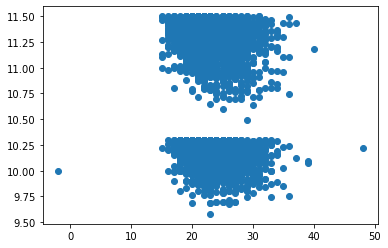

In [12]:
x =athlete_df["Age of competition"]
y= athlete_df["Mark"]


plt.scatter(x, y)
plt.show()

Removing outliners

In [13]:
sum(athlete_df["Age of competition"]>45)


1

In [14]:
sum(athlete_df["Age of competition"]<0)

1

In [15]:
athlete_df= athlete_df.loc[athlete_df["Age of competition"]<45]
athlete_df= athlete_df.loc[athlete_df["Age of competition"]>0]

sum(athlete_df["Age of competition"]>45)


0

In [16]:
 sum(athlete_df["Age of competition"]<0)

0

In [17]:
athlete_df.to_csv('step 4-final.csv')

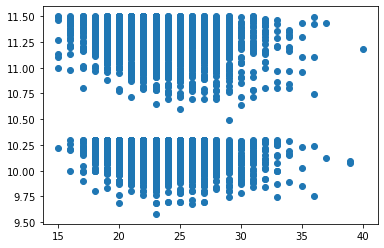

In [18]:
x =athlete_df["Age of competition"]
y= athlete_df["Mark"]


plt.scatter(x, y)
plt.show()

Pairplot coulmns

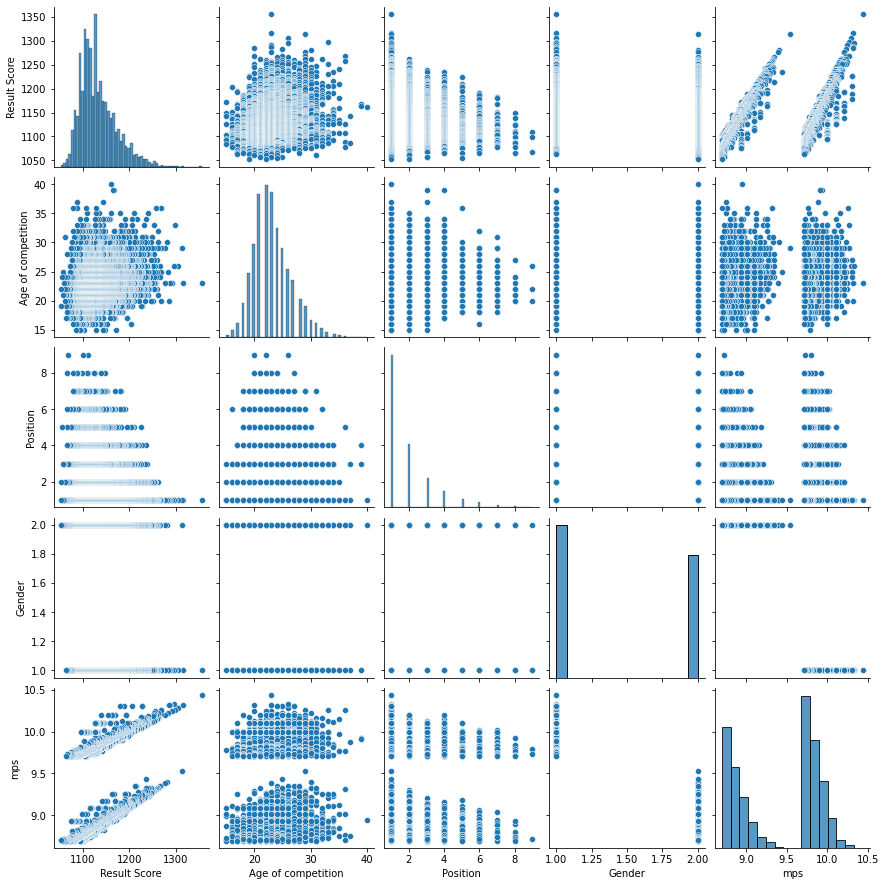

In [19]:
sns.pairplot(athlete_df[['Result Score','Age of competition', 'Position', 'Gender',"mps"]])


catplot with Age of competition and Position columns - boxen

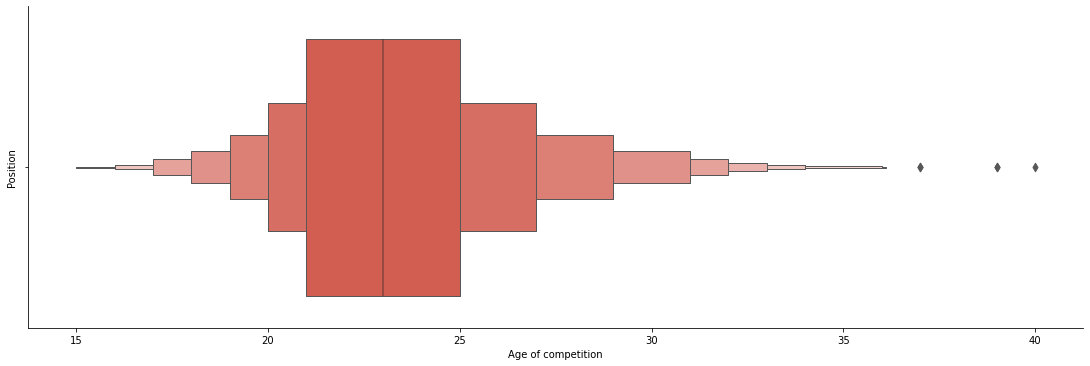

In [20]:
g = sns.catplot(
    x='Age of competition', 
    data = athlete_df,
    kind='boxen', 
    hue='Position',
    palette=['#E74C3C', '#7FB3D5', '#27AE60'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Age of competition', 'Position')


catplot with Position and Rank columns - count

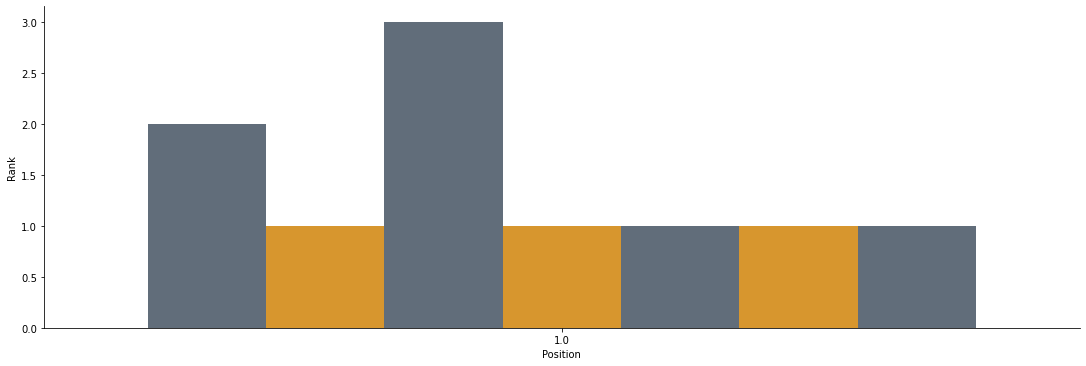

In [21]:
d = sns.catplot(
    x='Position', 
    data = athlete_df.head(10),
    kind='count', 
    hue='Rank',
    palette=['#5D6D7E', '#F39C12'],
    height=5, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Position', 'Rank')

Lineplot with Gender and Rank columns 

<AxesSubplot:xlabel='Gender'>

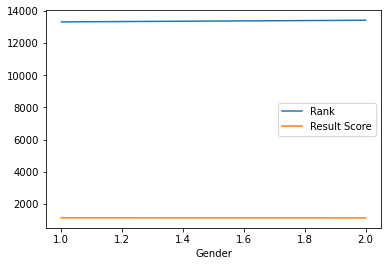

In [22]:
lineplot1 = athlete_df.groupby(['Gender']).mean()[['Rank',"Result Score"]]
lineplot1.plot()

Crosstab with Gewdner and Age of competition columns.

Text(0, 0.5, 'Gender')

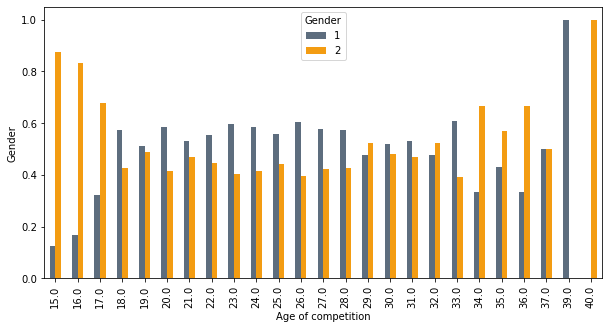

In [23]:
cross = pd.crosstab(athlete_df['Age of competition'],athlete_df['Gender'], normalize='index')

cross.plot(kind ='bar', figsize=(10,5), color=['#5D6D7E', '#F39C12'])
plt.xlabel('Age of competition')
plt.ylabel('Gender')

Show the value counts by Age of competition columns

In [24]:
athlete_df['Age of competition'].value_counts()


22.0    697
23.0    664
21.0    656
24.0    498
20.0    425
25.0    407
26.0    309
19.0    295
27.0    262
28.0    173
18.0    155
29.0    141
30.0     77
17.0     62
31.0     62
32.0     40
16.0     30
33.0     23
34.0     15
15.0      8
35.0      7
36.0      6
39.0      2
37.0      2
40.0      1
Name: Age of competition, dtype: int64